In [1]:
import geopandas as gp
import pandas as pd
# this helps us preview more rows and columns in our dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# this prevents pandas from displaying floats with scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import matplotlib.pyplot as plt

In [2]:
# read in CSV file of benchmarking data
data = pd.read_csv("data/Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.csv")

/Users/genevieve/anaconda3/envs/opendataweek/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data.head()

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Contractor,Primary Inverter Manufacturer,Primary Inverter Model Number,Total Inverter Quantity,Primary PV Module Manufacturer,PV Module Model Number,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
0,12/31/2019,4362-46733,Scotia,Schenectady,NY,12302,Residential,Residential/Small Commercial,PON 2112,National Grid,Purchase,09/03/2014,12/17/2014,Complete,"Monolith Solar Associates, LLC",SMA America,SB5000US (240V),1.00000,Trina Solar,TSM-255PA05,20.00000,22950.00000,5100.00000,5.10000,5987.00000,No,No,No,NaN,"Scotia, NY 12302\n(42.866806, -73.967054)"
1,12/31/2019,4629-81627,Ridge,Suffolk,NY,11961,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,Lease,12/15/2015,07/26/2016,Complete,Harvest Power,SMA America,SB7000TL-US-22-240V (240V),1.00000,SunPower,SPR-E20-327,24.00000,38552.20000,1570.00000,7.85000,9212.00000,No,No,No,NaN,"Ridge, NY 11961\n(40.893078, -72.883233)"
2,12/31/2019,4704-75046,Stuyvesant,Columbia,NY,12173,Residential,Residential/Small Commercial,PON 2112,National Grid,Lease,10/01/2015,11/13/2015,Complete,Tesla Energy Operations Inc.,ABB,PVI-4.2-OUTD-S-US-Z-A (240V),1.00000,Hanwha Q-Cells,Q.PRO-G4/SC 265,20.00000,29786.00000,3180.00000,5.30000,6221.00000,No,No,No,NaN,"Stuyvesant, NY 12173\n(42.376918, -73.758588)"
3,12/31/2019,4704-78623,Lynbrook,Nassau,NY,11563,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,Lease,10/22/2015,10/16/2016,Complete,Tesla Energy Operations Inc.,ABB,PVI-5000-OUTD-US-Z-A (240V),1.00000,Trina Solar,TSM-260PD05.18,22.00000,32032.00000,1144.00000,5.72000,6714.00000,No,No,No,NaN,"Lynbrook, NY 11563\n(40.657513, -73.673957)"
4,12/31/2019,4704-90236,Yonkers,Westchester,NY,10703,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,02/10/2016,08/01/2016,Complete,Tesla Energy Operations Inc.,ABB,PVI-3.0-OUTD-S-US-Z-A (240V),1.00000,Trina Solar,TSM-260PD05.18,17.00000,24752.00000,2652.00000,4.42000,5188.00000,No,No,No,NaN,"Yonkers, NY 10703\n(40.957068, -73.880829)"


In [11]:
# The counties we care about are New York (Manhattan), Bronx, Kings (Brooklyn), Queens, Richmond (Staten Island)
# nyc_data = data[data["County"] == 'Richmond' or data["County"] == 'New York' or data["County"] == 'Bronx'] or data["County"] == 'Queens' or data["County"] == 'Kings']
nyc_data = data[data.County.astype(str).isin(['New York','Bronx','Kings', 'Queens', 'Richmond'])]

In [15]:
nyc_data.County.value_counts()

Queens      9413
Richmond    7558
Kings       4357
Bronx       2117
New York     840
Name: County, dtype: int64

In [17]:
nyc_data.Sector.value_counts()

Residential        22822
Non-Residential     1463
Name: Sector, dtype: int64

In [20]:
nyc_data["Project Status"].value_counts()

Complete    22191
Pipeline     2094
Name: Project Status, dtype: int64

In [23]:
nyc_data["Expected KWh Annual Production"].describe()

count      24285.00000
mean       14288.65365
std       125717.67389
min          370.00000
25%         4930.00000
50%         6691.00000
75%         9297.00000
max     11489170.00000
Name: Expected KWh Annual Production, dtype: float64

In [24]:
nyc_data.head()

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Contractor,Primary Inverter Manufacturer,Primary Inverter Model Number,Total Inverter Quantity,Primary PV Module Manufacturer,PV Module Model Number,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
10,12/31/2019,81880,Bronx,Bronx,NY,10461,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,04/13/2017,02/22/2018,Complete,SunRun Inc.,ABB,PVI-3.6-OUTD-S-US-A (240V),1.00000,LG Electronics,LG310N1C-G4,15.00000,15911.00000,1860.00000,4.65000,5458.00000,NaN,No,No,NaN,"Bronx, NY 10461\n(40.846823, -73.840311)"
11,12/31/2019,91240,Brooklyn,Kings,NY,11203,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,06/15/2017,09/28/2017,Complete,SunPower Capital LLC,SunPower,SPR-X21-345-C-AC,16.00000,SunPower,SPR-X21-345-C-AC,16.00000,22687.20000,1656.00000,5.52000,6480.00000,NaN,No,No,NaN,"Brooklyn, NY 11203\n(40.649707, -73.933487)"
15,12/31/2019,179557,Bronx,Bronx,NY,10466,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,03/21/2019,NaN,Pipeline,NaN,SunPower,SPR-E20-327-D-AC [240V],26.00000,Sunpower,SPR-E20-327-D-AC,26.00000,44981.41000,2551.00000,8.50000,9980.00000,NaN,No,No,NaN,"Bronx, NY 10466\n(40.891057, -73.846822)"
16,12/31/2019,207583,Queens,Queens,NY,11367,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Purchase,08/14/2019,NaN,Pipeline,NaN,SunPower,SPR-X22-370-E-AC [240V],19.00000,Sunpower,SPR-X22-370-E-AC,19.00000,31474.00000,2109.00000,7.03000,8252.00000,NaN,No,No,NaN,"Queens, NY 11367\n(40.729914, -73.824338)"
17,12/31/2019,212189,Queens,Queens,NY,11429,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,09/13/2019,NaN,Pipeline,NaN,SunPower,SPR-E20-327-E-AC [240V],14.00000,Sunpower,SPR-E20-327-E-AC,14.00000,34019.64000,1373.00000,4.58000,5374.00000,NaN,No,No,NaN,"Queens, NY 11429\n(40.70975, -73.73906)"


In [30]:
nyc_data["Date Completed"].value_counts()

01/18/2018    89
10/13/2017    89
04/20/2017    81
03/16/2018    70
03/05/2018    66
              ..
09/16/2013     1
03/12/2014     1
05/30/2012     1
02/13/2014     1
12/03/2012     1
Name: Date Completed, Length: 1816, dtype: int64

In [50]:
nyc_data["Date Completed datetime"] = pd.to_datetime(nyc_data['Date Completed'])
nyc_data["Date Application Received datetime"] = pd.to_datetime(nyc_data['Date Application Received'])

/Users/genevieve/anaconda3/envs/opendataweek/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/genevieve/anaconda3/envs/opendataweek/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24285 entries, 10 to 103762
Data columns (total 34 columns):
Reporting Period                         24285 non-null object
Project Number                           24285 non-null object
City                                     24285 non-null object
County                                   24285 non-null object
State                                    24285 non-null object
Zip Code                                 24285 non-null int64
Sector                                   24285 non-null object
Program Type                             24285 non-null object
Solicitation                             24285 non-null object
Electric Utility                         24285 non-null object
Purchase Type                            23658 non-null object
Date Application Received                24285 non-null object
Date Completed                           22191 non-null object
Project Status                           24285 non-null object
Contract

In [56]:
# nyc_data["Date Completed datetime"].value_counts()
nyc_data['Year Completed'] = pd.DatetimeIndex(nyc_data['Date Completed datetime']).year
nyc_data['Month Completed'] = pd.DatetimeIndex(nyc_data['Date Completed datetime']).month
nyc_data['Year Applied'] = pd.DatetimeIndex(nyc_data['Date Application Received datetime']).year.astype(int)
nyc_data['Month Applied'] = pd.DatetimeIndex(nyc_data['Date Application Received datetime']).month

/Users/genevieve/anaconda3/envs/opendataweek/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/genevieve/anaconda3/envs/opendataweek/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/genevieve/anaconda3/envs/opendataweek/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to b

In [58]:
nyc_data["Year Applied"].dtype

dtype('int64')

In [59]:
nyc_data["Year Applied"].value_counts()

2019    5644
2018    4823
2017    4320
2016    3537
2015    2106
2014    1879
2013    1131
2012     232
2011     180
2010     177
2009      93
2008      69
2007      29
2006      25
2005      15
2004      12
2003      11
2002       2
Name: Year Applied, dtype: int64

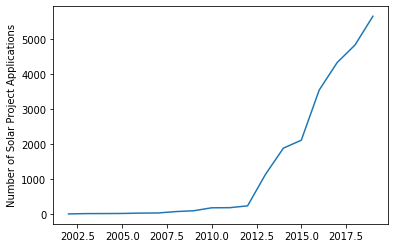

In [61]:
plt.plot(nyc_data["Year Applied"].value_counts())
plt.ylabel('Number of Solar Project Applications')
# plt.xticks(range(2002,2020))
plt.show()

In [62]:
est_power_by_county = nyc_data.groupby('County', as_index=False)['Expected KWh Annual Production'].sum()

In [89]:
est_power_by_county

,County,Expected KWh Annual Production
0,Bronx,42408332.00000
1,Kings,55729587.00000
2,New York,49097937.00000
3,Queens,109465504.00000
4,Richmond,90298594.00000


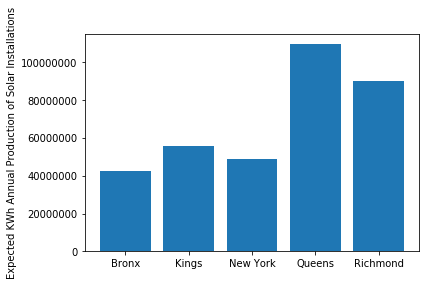

In [95]:
# est_power_by_county
counties = ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond']
values = est_power_by_county['Expected KWh Annual Production']

# fig, axs = plt.subplots(1, 1)
plt.bar(counties, values)
plt.ylabel('Expected KWh Annual Production of Solar Installations')
plt.xticks(counties)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

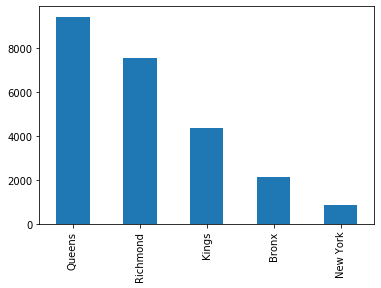

In [102]:
# plt.bar(counties, nyc_data["County"].value_counts())
nyc_data["County"].value_counts().plot(kind='bar')

In [98]:
pv_modules_by_county = nyc_data.groupby('County', as_index=False)['Total PV Module Quantity'].sum()

In [104]:
pv_modules_by_county

,County,Total PV Module Quantity
0,Bronx,97088.00000
1,Kings,129954.00000
2,New York,119263.00000
3,Queens,271047.00000
4,Richmond,214671.00000
